In [1]:
from PIL import Image, ImageDraw



In [55]:

im = Image.new('1', (128, 128), 0)
# mode = '1': black / white
# see https://pillow.readthedocs.io/en/stable/handbook/concepts.html#concept-modes
draw = ImageDraw.Draw(im)

In [56]:
#draw.ellipse((100, 100, 150, 200), fill=(255, 0, 0), outline=(0, 0, 0))
#draw.rectangle((200, 100, 300, 200), fill=(0, 192, 192), outline=(255, 255, 255))
#draw.line((350, 200, 450, 100), fill=(255, 255, 0), width=10)

#im.save('pillow_imagedraw.jpg', quality=95)


In [57]:
draw.regular_polygon((50, 50, 10), 3, rotation=0, fill=None, outline=1)

In [58]:
#im.show()

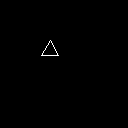

In [59]:
from IPython.display import display
display(im)

In [30]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [60]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)))
#model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
#model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))


In [61]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [62]:
model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 126, 126, 32)      320       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 124, 124, 64)      18496     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 122, 122, 64)      36928     
_________________________________________________________________
flatten_3 (Flatten)          (None, 952576)            0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                60964928  
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 65        
Total params: 61,020,737
Trainable params: 61,020,737
Non-trainable params: 0
__________________________________________

In [71]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [64]:
import numpy as np

In [69]:
train_images = np.array(im)
print(train_images.shape)
train_images = np.expand_dims(train_images, axis=0)
print(train_images.shape)
train_images = np.expand_dims(train_images, axis=train_images.ndim)
print(train_images.shape)

train_labels = np.array((1))
print(train_labels.shape)
train_labels = np.expand_dims(train_labels, axis=0)
print(train_labels.shape)


(128, 128)
(1, 128, 128)
(1, 128, 128, 1)
()
(1,)


In [72]:

history = model.fit(train_images, train_labels, epochs=10)#, 
#                    validation_data=(test_images, test_labels))


Train on 1 samples
Epoch 1/10
1/1 [==============================] - 1s 1s/sample - loss: 0.4892 - accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 395ms/sample - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 233ms/sample - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 284ms/sample - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 254ms/sample - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 264ms/sample - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 0s 233ms/sample - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 8/10
1/1 [==============================] - 0s 203ms/sample - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 9/10
1/1 [==============================] - 0s 234ms/sample - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 10/10
1/1 [==============================]

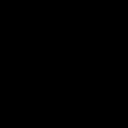

In [77]:
im_test_blank = Image.new('1', (128, 128), 0)
draw = ImageDraw.Draw(im_test_blank)
display(im_test_blank)

test_images = np.array(im_test_blank)
test_images = np.expand_dims(test_images, axis=0)
test_images = np.expand_dims(test_images, axis=test_images.ndim)

test_labels = np.array((0))
test_labels = np.expand_dims(test_labels, axis=0)


In [78]:

history_inclval = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))


Train on 1 samples, validate on 1 samples
Epoch 1/10
1/1 [==============================] - 1s 563ms/sample - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 1.0914 - val_accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 316ms/sample - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 1.1293 - val_accuracy: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 306ms/sample - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 1.1658 - val_accuracy: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 304ms/sample - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 1.2007 - val_accuracy: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 315ms/sample - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 1.2340 - val_accuracy: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 329ms/sample - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 1.2656 - val_accuracy: 0.0000e+00
Epoch 7/10
1/1 [==============================] - 0s 445ms